Uso de Jinja2 (Python) con HTML
===

* *60 min* | Última modificación: Febrero 19, 2020.

## Data

In [8]:
import pandas as pd

data = [[45939, 21574, 2876, 1815, 1646,   89,  555],
        [60423, 29990, 4708, 2568, 2366, 1411,  733],
        [64721, 32510, 5230, 2695, 2526, 1546,  773],
        [68484, 35218, 6662, 2845, 2691, 1663,  836],
        [71799, 37598, 6856, 3000, 2868, 1769,  911],
        [76036, 40341, 8220, 3145, 3054, 1905, 1008],
        [79831, 43173, 9053, 3338, 3224, 2005, 1076]]



data = pd.DataFrame(
    data = data,
    index = [1951, 1956, 1957, 1958, 1959, 1960, 1961],
    columns = ['N.Amer', 'Europe', 'Asia', 'S.Amer', 'Oceania', 'Africa', 'Mid.Amer']
)

data

N.Amer  Europe  Asia  S.Amer  Oceania  Africa  Mid.Amer
1951   45939   21574  2876    1815     1646      89       555
1956   60423   29990  4708    2568     2366    1411       733
1957   64721   32510  5230    2695     2526    1546       773
1958   68484   35218  6662    2845     2691    1663       836
1959   71799   37598  6856    3000     2868    1769       911
1960   76036   40341  8220    3145     3054    1905      1008
1961   79831   43173  9053    3338     3224    2005      1076

## Generación de las figuras

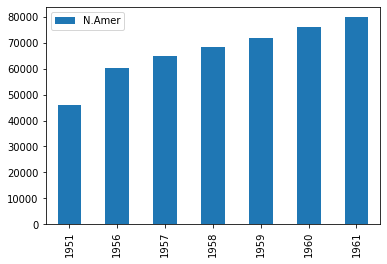

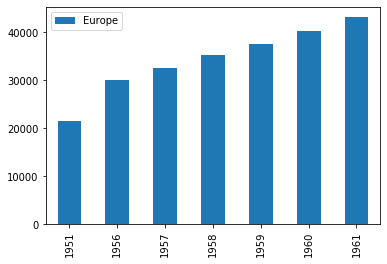

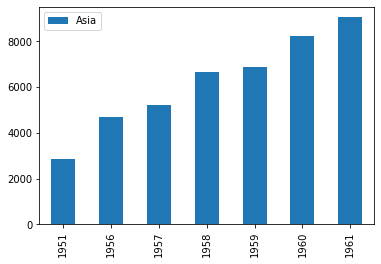

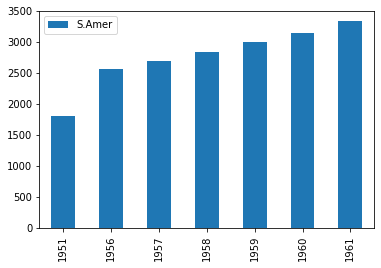

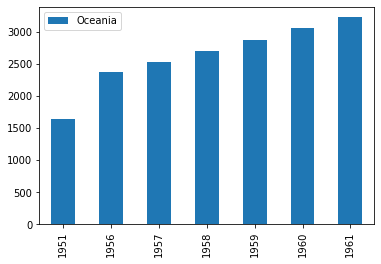

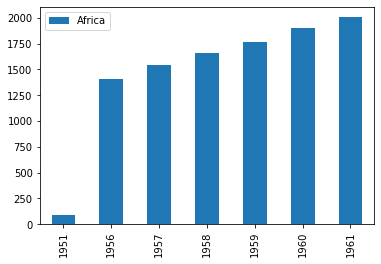

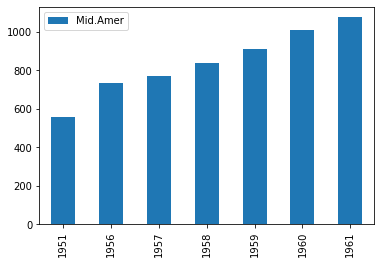

In [9]:
for col in data.columns:
    fig = data.plot.bar(y=col).get_figure().savefig('figs/' + col + '.png')

## Plantilla para la página web

In [10]:
!mkdir -p templates

In [20]:
%%writefile templates/index.html

<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <title>Telephones</title>    
    
    <style>
    
        body {
          font-family: Arial, Helvetica, sans-serif;
          padding-left: 10px;
        }
        
        header {
            font-size: 20px;
        }
        
        nav {
          float: left;
          width: 20%;
          height: 150px;
          background: #eeeeee;
          padding: 20px;
        }
        
        .seltext {
            font-weight: bold;
        }
        
        .auxtext {
            font-size: 14px;
            color: #807F7F;
        }
    
    </style>
    
  </head>
  <body>
    
    <header>
      <h2>Telephones by region</h2>
    </header>
    
    <nav style="border:1px solid #BEBDBD; border-width:2px;">
      <p class="seltext">Region:</p>
      <select id="region" name="region"  onchange="selectPlot()">

        <!--- Este codigo se elimina 
        <option value="N.Amer">N.Amer</option>
        <option value="Europe">Europe</option>
        <option value="Asia">Asia</option>
        <option value="S.Amer">S.Amer</option>
        <option value="Oceania">Oceania</option>
        <option value="Africa">Africa</option>
        <option value="Mid.Amer">Mid.Amer</option>
        --->
        
        <!--- Genera las opciones del menu usando Jinja2 --->
        
        {% for i in regions %}
            <option value="{{ i }}">{{ i }}</option>
        {% endfor %}
      
        <!--- Fin de la modificacion ---> 
    
      </select>
      <br>
      <hr>
      <p class="auxtext"> Data from AT&T (1961) The World's Telephones. </p>
    </nav>
       
    <div>
    
      <!--- Este codigo se elimina 
      <div class="myImage" id="N.Amer"   style="display:block"> <img src="figs/N.Amer.png"   alt="N.Amer">   </div>
      <div class="myImage" id="Europe"   style="display:none">  <img src="figs/Europe.png"   alt="Europe">   </div>
      <div class="myImage" id="Asia"     style="display:none">  <img src="figs/Asia.png"     alt="Asia">     </div>
      <div class="myImage" id="S.Amer"   style="display:none">  <img src="figs/S.Amer.png"   alt="S.Amer">   </div>
      <div class="myImage" id="Oceania"  style="display:none">  <img src="figs/Oceania.png"  alt="Oceania">  </div>
      <div class="myImage" id="Africa"   style="display:none">  <img src="figs/Africa.png"   alt="Africa">   </div>
      <div class="myImage" id="Mid.Amer" style="display:none">  <img src="figs/Mid.Amer.png" alt="Mid.Amer"> </div>
      --->


      <!--- Genera la division de cada imagen usando Jinja2 --->  
    
    
      {% for i in regions %}
        {% if i == regions[0] %}
          <div class="myImage" id="{{ i }}" style="display:block"> <img src="figs/{{ i }}.png" alt="{{ i }}"> </div>  
        {% else %}
          <div class="myImage" id="{{ i }}" style="display:none"> <img src="figs/{{ i }}.png" alt="{{ i }}"> </div>  
        {% endif %}
      {% endfor %}
    
      <!--- Fin de la modificacion --->

    </div>
        
    <script>
      function selectPlot() {
        var region = document.getElementById("region").value;
        var images = document.getElementsByClassName("myImage");
        for (var i = 0; i < images.length; i++) {
          if (images[i].id == region) {
            images[i].style.display = "block"
          }else{
            images[i].style.display = "none"
          }
        }
      }
    </script>
  </body>
</html>

Overwriting templates/index.html


## Generación de la página

In [21]:
from jinja2 import Template
str = open('templates/index.html', 'r').read()
template = Template(str)
str = template.render(regions=data.columns.tolist())
open('index.html', 'w').write(str)

4424